In [35]:
out_image_size =2048
row = 9
col = 5
num_images = 45
base_path = '../output/yolov3 prediction using the weights at epoch 3/'

In [36]:
from glob import glob
image_folder = base_path

types = ('png', 'jpg') # the tuple of file types
img_paths = []
for t in types:
    img_paths.extend(glob(image_folder + '*.{}'.format(t)))
len(img_paths)

45

In [37]:
def removeAxeEdge(ax):
    for loc, spine in ax.spines.items():
        spine.set_color('none')
        
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])

idx: 0  width , height , x_offset= 496 , 279 , P0
0 279 0 496
(279, 496, 3)
idx: 1  width , height , x_offset= 496 , 279 , P496
0 279 496 992
(279, 496, 3)
idx: 2  width , height , x_offset= 496 , 279 , P992
0 279 992 1488
(279, 496, 3)
idx: 3  width , height , x_offset= 496 , 279 , P1488
0 279 1488 1984
(279, 496, 3)
idx: 4  width , height , x_offset= 496 , 279 , P1984
0 279 1984 2480
(279, 496, 3)
idx: 5  width , height , x_offset= 496 , 279 , P0
279 558 0 496
(279, 496, 3)
idx: 6  width , height , x_offset= 496 , 279 , P496
279 558 496 992
(279, 496, 3)
idx: 7  width , height , x_offset= 496 , 279 , P992
279 558 992 1488
(279, 496, 3)
idx: 8  width , height , x_offset= 496 , 279 , P1488
279 558 1488 1984
(279, 496, 3)
idx: 9  width , height , x_offset= 496 , 279 , P1984
279 558 1984 2480
(279, 496, 3)
idx: 10  width , height , x_offset= 496 , 279 , P0
558 837 0 496
(279, 496, 3)
idx: 11  width , height , x_offset= 496 , 279 , P496
558 837 496 992
(279, 496, 3)
idx: 12  width , heigh

ValueError: could not broadcast input array from shape (279,496,3) into shape (248,496,3)

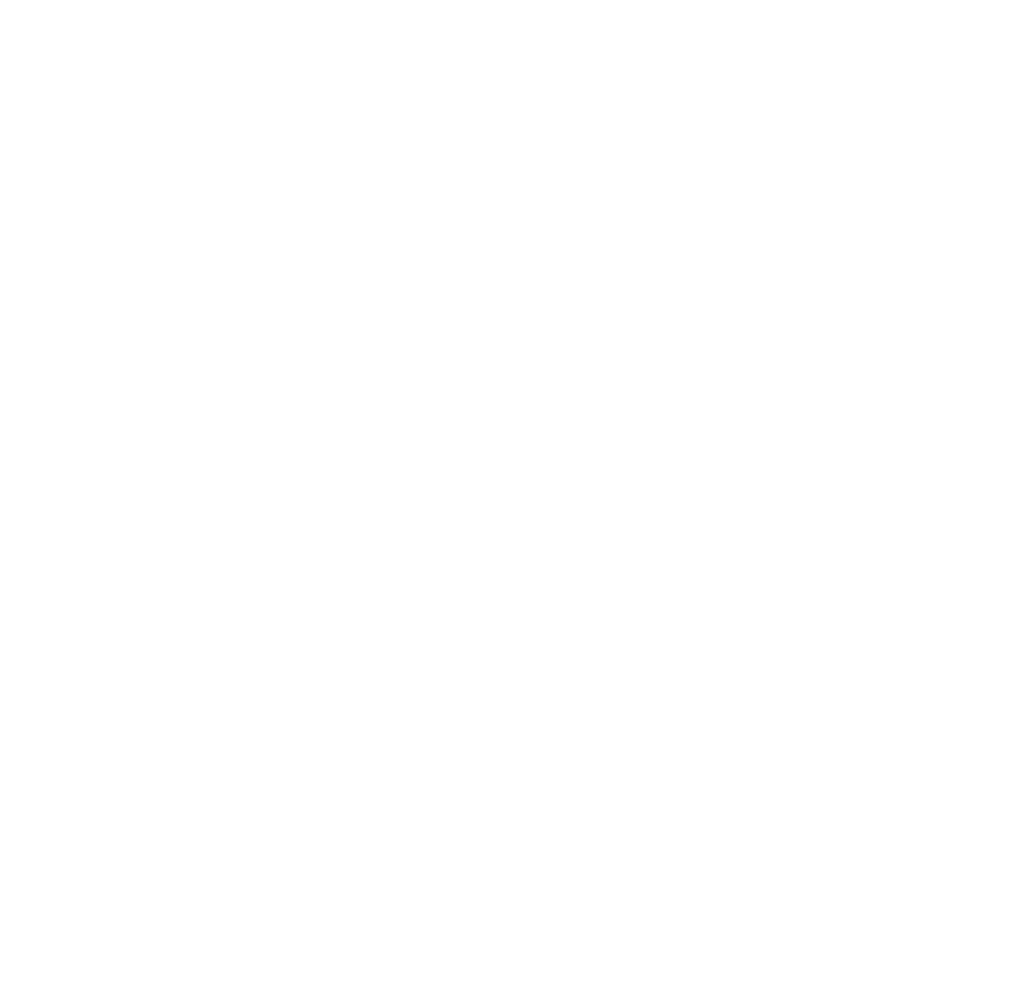

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread(img_paths[0],cv2.IMREAD_UNCHANGED)

width = image.shape[1]
height = image.shape[0] 
# print("height =", height)
out_image_width = width * col
out_image_height = height * row

out_image = np.zeros(shape=[out_image_width, out_image_height, 3], dtype=np.uint8)
fig=plt.figure(figsize=(18,18))
ax = fig.add_subplot()
removeAxeEdge(ax)

row_idx = 0
col_idx = 0
x_offset = 0
y_offset = 0

for idx, img_path in enumerate(img_paths):    
    
    image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    width = image.shape[1]
    height = image.shape[0]
    print("idx:",idx," width , height , x_offset= {} , {} , {}".format(width,height,x_offset))
    print('{} {} {} {}'.format(y_offset,y_offset+height,x_offset,x_offset+width))
    print(image.shape)
    out_image[y_offset:y_offset+height, x_offset:x_offset+width] = image
    
    if col_idx != col-1:
        col_idx += 1
        x_offset += width
    else:
        col_idx = 0
        x_offset = 0
        if row_idx != row-1:
            row_idx += 1
            y_offset += height
            
plt.imshow(out_image)
plt.show()


    